In [1]:
import sys
sys.path.append('../preprocess_assets/')

In [2]:
# Main libraries 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

# Our files
from data_shuffling_split import *
from features_extraction import *
from ara_vec_preprocess_configs import *
from ml_modeling import *

In [3]:
strat_train_set = read_file("dialect_prediction/train/strat_train_set.csv")
strat_train_set.head()

,id,dialect,text,label
0,939759633866088448,AE,قال لها اعطيك نص راتبي وتبطلين الشك والتحقيق !...,0
1,1052304577591209984,PL,مقتنع جدا بفكره انو الناس اذواق . لكن لما بسمع...,11
2,1001494383135477760,IQ,حسابشخصي حسابشخصي حسابشخصي هاا يمعود تجي وحدك ...,4
3,693409524665942016,KW,الرومنسيه بس بلوزن الثقيل . هه رابطويب,6
4,1078727287292526592,LB,حسابشخصي حسابشخصي بخصوص جوليا الها حق تحكي سيا...,7


In [4]:
x_train_text, x_val_text, y_train, y_val = prepare_data(strat_train_set)

The number of instances in the training data after StratifiedShuffleSplit are:  440052
The number of instances in the testing data after StratifiedShuffleSplit are:   8981
The number of trainin instances:  440052
The number of validation instances:  8981
The number of trainin labels :  440052
The number of validation labels :  8981


In [5]:
x_train_text_tokenized = tokenize_using_nltk_TreebankWordTokenizer(x_train_text)

print("Before Tokenization : \n", x_train_text[:3])
print("="*50)
print("After Tokenization : \n", x_train_text_tokenized[:3])
print("="*50)

x_val_text_tokenized = tokenize_using_nltk_TreebankWordTokenizer(x_val_text)

print("Before Tokenization : \n", x_val_text[:3])
print("="*50)
print("After Tokenization : \n", x_val_text_tokenized[:3])

fullgram_x_train_text_tokenized = get_all_ngrams(x_train_text_tokenized)
print("full gram tokenization : \n", fullgram_x_train_text_tokenized[:3])
print("="*50)
fullgram_x_val_text_tokenized = get_all_ngrams(x_val_text_tokenized)
print("full gram tokenization : \n", fullgram_x_val_text_tokenized[:3])
print("="*50)

Before Tokenization : 
 ['انا اذكر اني دافع خمس دنانير حق بناء السور الرابع ايام المتوسطه . . . وينهم ابيهم الحين 😏 ', 'حسابشخصي دااعش همه انتتو منو الي سوا داعش غيركم ؟ ؟ ؟ مافي شخص بالكون مايعرف انو الي سوا داعش هوه انتم لان انتم عباره عن ناس ماعدها رحمه كلهم انتو', 'ايه اخبار الاضحوكه قولتلي 😂 رابطويب']
After Tokenization : 
 [['انا', 'اذكر', 'اني', 'دافع', 'خمس', 'دنانير', 'حق', 'بناء', 'السور', 'الرابع', 'ايام', 'المتوسطه', '.', '.', '.', 'وينهم', 'ابيهم', 'الحين', '😏'], ['حسابشخصي', 'دااعش', 'همه', 'انتتو', 'منو', 'الي', 'سوا', 'داعش', 'غيركم', '؟', '؟', '؟', 'مافي', 'شخص', 'بالكون', 'مايعرف', 'انو', 'الي', 'سوا', 'داعش', 'هوه', 'انتم', 'لان', 'انتم', 'عباره', 'عن', 'ناس', 'ماعدها', 'رحمه', 'كلهم', 'انتو'], ['ايه', 'اخبار', 'الاضحوكه', 'قولتلي', '😂', 'رابطويب']]
Before Tokenization : 
 ['بعشقها وبشتريها للان بس اشوفها في المحلات وباكلها ب اصبع ايدي مش محتاجه ملعقه رابطويب', 'حسابشخصي يالمهيني . . . اذا الله رزقك بهالنوع من البشر برمضان تقدر تتصدق علي باجي المصلين . ونش الداخليه م

In [6]:
# Get how many words inside each text after tokenization
num_of_words_in_each_text = [len(text) for text in fullgram_x_train_text_tokenized]
max_len = max(num_of_words_in_each_text)
print("The max length is: ", max_len)
num_of_words_in_each_text[:10]

The max length is:  279


[54, 90, 15, 12, 36, 48, 21, 84, 27, 42]

The number of keys before removing are:  86
The number of keys after removing some of them are:  50


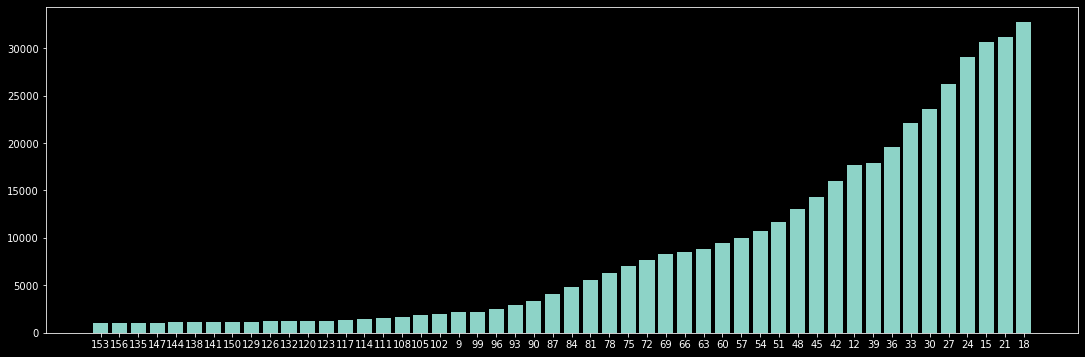

In [7]:
# count how many times these value repeated and sort them
new_dicts = get_keys_that_val_gr_than_num(num_of_words_in_each_text, 1000)
keys = list(new_dicts.keys())
values = list(new_dicts.values())
plt.style.use('dark_background')
fig = plt.gcf()
fig.set_size_inches(18.5, 6)
plt.bar(range(len(new_dicts)), values, tick_label=keys)
plt.show()

In [ ]:
ourmodel = load_word2vec_model("models/word2vec/bakrianoo_unigram_cbow_model/full_uni_cbow_100_twitter.mdl")
bakr_model = load_word2vec_model("models/word2vec/bakrianoo_unigram_cbow_model/full_uni_cbow_100_twitter.mdl")
muhammed_model = load_word2vec_model("models/word2vec/bakrianoo_unigram_cbow_model/full_uni_cbow_100_twitter.mdl")

In [ ]:
number_of_features = 100
max_len_str = 128
word2vec_path = "bakr/"
model_path_to_save = "models/ml_models/"
estimators = voting_models()

X_train_embed_matrix = text_to_matrix_using_word2vec(word_to_vec_model, x_train_text_tokenized, max_len_str)
X_val_embed_matrix = text_to_matrix_using_word2vec(word_to_vec_model, x_val_text_tokenized, max_len_str)

# Train Logistic Regression

In [ ]:
model = LogisticRegression(penalty='l2', C=1, multi_class='multinomial', solver='lbfgs', verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

# Train SVC

In [ ]:
model = LinearSVC(C=0.5,  max_iter=50, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

# Hard Voting

In [ ]:
model = VotingClassifier(estimators, voting="hard")
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

# Extr Tree Classifier

In [ ]:
model = ExtraTreesClassifier(n_estimators=100, max_depth=5, max_samples=.1, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

# AdaBoost 

In [ ]:
model = LinearSVC(C=0.5,  verbose=1)
model = AdaBoostClassifier(model,  algorithm="SAMME", n_estimators=5)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

#  Gradient Boosting

In [ ]:
model = GradientBoostingClassifier(n_estimators=10, subsample=.1, learning_rate=.5,   max_depth=5, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

# XGBClassifier

In [ ]:
model = XGBClassifier(max_depth=5, subsample=.1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

# Rezk

In [ ]:
word_to_vec_model = load_word2vec_model("models/word2vec/rezk_unigram_CBOW_model/train_word2vec_cbow__window_3_min_count_300")

In [ ]:
number_of_features = 300
max_len_str = 64
word2vec_path = "rezk/"
model_path_to_save = "models/ml_models/"
estimators = voting_models()

X_train_embed_matrix = text_to_matrix_using_word2vec(word_to_vec_model, x_train_text_tokenized, max_len_str)
X_val_embed_matrix = text_to_matrix_using_word2vec(word_to_vec_model, x_val_text_tokenized, max_len_str)

# Train Logistic Regression

In [ ]:
model = LogisticRegression(penalty='l2', C=1, multi_class='multinomial', solver='lbfgs', verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

# Train SVC

In [ ]:
model = LinearSVC(C=0.5,  max_iter=50, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

# Bagging Classifier

In [ ]:
dec_tree_cls = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1)
model = BaggingClassifier(base_estimator=dec_tree_cls, n_estimators=100, max_samples=.2, verbose=1)
ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

# Extr Tree Classifier

In [ ]:
model = ExtraTreesClassifier(n_estimators=100, max_depth=5, max_samples=.1, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

# AdaBoost 

In [ ]:
model = LinearSVC(C=0.5,  verbose=1)
model = AdaBoostClassifier(model,  algorithm="SAMME", n_estimators=5)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

#  Gradient Boosting

In [ ]:
model = GradientBoostingClassifier(n_estimators=10, subsample=.1, learning_rate=.5,   max_depth=5, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

# XGBClassifier

In [ ]:
model = XGBClassifier(max_depth=5, subsample=.1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

# Note !

**We can use different word embedding representation, to see its effect on training.**